# Cirq

## Installation

``pip install cirq``

## Funktionstest

In [2]:
import cirq

print(cirq.google.Foxtail)

(0, 0)───(0, 1)───(0, 2)───(0, 3)───(0, 4)───(0, 5)───(0, 6)───(0, 7)───(0, 8)───(0, 9)───(0, 10)
│        │        │        │        │        │        │        │        │        │        │
│        │        │        │        │        │        │        │        │        │        │
(1, 0)───(1, 1)───(1, 2)───(1, 3)───(1, 4)───(1, 5)───(1, 6)───(1, 7)───(1, 8)───(1, 9)───(1, 10)


## Hello Qubit

Circuit
0: ───M───
Result
0=0


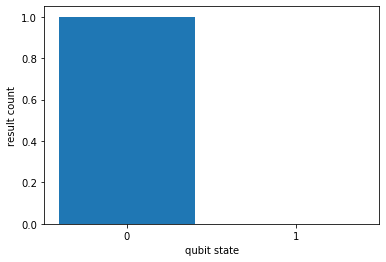

array([1., 0.])

In [3]:
# pick a qubit
qubit = cirq.LineQubit(0) # position 0

# create a circuit
circuit = cirq.Circuit(
    cirq.measure(qubit)
)

print("Circuit")
print(circuit)

# simulate
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=1)

print("Result")
print(result)

cirq.plot_state_histogram(result)

# CNOT

In [11]:
# pick qubits
qubit0 = cirq.LineQubit(0) # position 0
qubit1 = cirq.LineQubit(1) # position 1

circuit = cirq.Circuit(
    cirq.CNOT(control=qubit0, target=qubit1),
    cirq.measure(qubit1)
)

print("Circuit")
print(circuit)

# simulate
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=10)

print("Result")
print(result)

Circuit
0: ───@───────
      │
1: ───X───M───
Result
1=0000000000


## Hadamard

Circuit
0: ───H───M───
Result
0=11100101110110101011111000111111110001101011100111010011100001101001100000000101111000010001010010100000001001011111011111110101011110100011001101100101001001101111001011111001010110100000000100000010100010101010001110001011000100110111011001001011100001101111110000011001001011111100111101011101110001010000011010101001001111010100001101100010101001101000110111111000111101110001001011001101000010110110110000011111010011111001110010101111111001110010011110001111111000000011000000000011100100011011001001011100000011110000111011110110000101111001100100011011101101101110011111010101101010100011100100001011101101010000100001101011000010111011111011001101100000011110100011100111011101110001010100101000100000010101110011111011000000000111110011001010101011111100000110001101101101100100100000001110110010000010000001101010110010111101001000010101110011101111110101100110010101001011010100111001110100000100011011100001011001100001001111011100001101010011101001011001

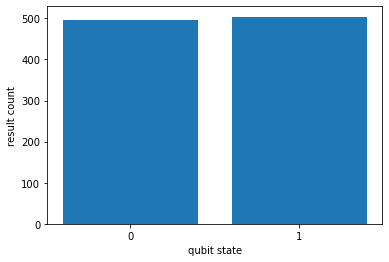

array([496., 504.])

In [9]:
# pick a qubit
qubit = cirq.LineQubit(0) # position 0

# create a circuit with HADAMARD
circuit = cirq.Circuit(
    cirq.H(qubit),
    cirq.measure(qubit)
)

print("Circuit")
print(circuit)

# simulate
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=1000)

print("Result")
print(result)

cirq.plot_state_histogram(result)